In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
cityTemps_file = open("EuCitiesTemperatures.csv")
citytemps = pd.read_csv(cityTemps_file)
citytemps

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [3]:
def getCountryLocationAvg(country_in,coord_in):
    
    filter_country = citytemps.groupby('country')[coord_in].mean().loc[country_in]
    
    return round(filter_country,2)

In [4]:
def get_average_temp(country_in):
    
    temp_df = citytemps[citytemps['country'] == country_in]
    
    EU = temp_df['EU'].iloc[0]
    Coast_line = temp_df['coastline'].iloc[0]
    
    average_value = citytemps[(citytemps['EU'] == EU) & (citytemps['coastline'] == Coast_line)]['temperature'].mean()
    
    return round(average_value,2)

In [5]:
df1 = citytemps.copy()

lat_column = []
long_column = []
temp_column = []

for id, row in df1.iterrows():
    if np.isnan(row['latitude']):
        lat_column.append(getCountryLocationAvg(row[1],'latitude'))
    else:
        lat_column.append(row['latitude'])
    if np.isnan(row['longitude']):
        long_column.append(getCountryLocationAvg(row[1],'longitude'))
    else:
        long_column.append(row['longitude'])
    if np.isnan(row['temperature']):
        temp_column.append(get_average_temp(row[1]))
    else:
        temp_column.append(row['temperature'])
        
        
df1['latitude'] = lat_column
df1['longitude'] = long_column
df1['temperature'] = temp_column

In [6]:
new_df1 = df1[(df1['latitude'] >=40) & (df1['latitude'] <=60) & (df1['longitude'] >=15) & (df1['longitude'] <=30)]
Country_most_cities = new_df1.groupby('country')['city'].count().sort_values(ascending=False)

i=0
while Country_most_cities[i] == Country_most_cities[0]:
    print(Country_most_cities.index[i])
    print(new_df1[new_df1['country'] == Country_most_cities.index[i]]['city'].tolist())
    i+=1
    
new_df1

Romania
['Botosani', 'Braila', 'Bucharest', 'Craiova', 'Sibiu', 'Arad', 'Bacau', 'Baia Mare', 'Constanta']
Poland
['Bialystok', 'Bydgoszcz', 'Bytom', 'Elblag', 'Kielce', 'Koszalin', 'Poznan', 'Wroclaw', 'Warsaw']


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42
...,...,...,...,...,...,...,...,...
165,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.16
169,Edirne,Turkey,79.62,no,yes,41.67,26.57,9.73
183,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.02
186,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.06


<ipython-input-7-858d645ad589>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_cities['region'] = np.array(new_column)


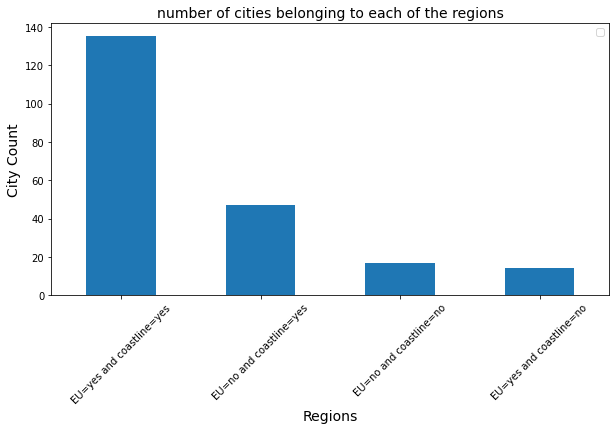

In [7]:
#Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above

region_cities = df1[['city','EU','coastline']]

def region(city_in):
    
    EU = region_cities[region_cities['city'] == city_in]['EU'].values[0]
    coastline = region_cities[region_cities['city'] == city_in]['coastline'].values[0]
    
    if EU == 'yes' and coastline == 'yes':
        return f'EU={EU} and coastline={coastline}'
    return f'EU={EU} and coastline={coastline}'

new_column =  region_cities['city'].apply(region)

region_cities['region'] = np.array(new_column)

region_cities = region_cities[['city','region']]

axis = region_cities['region'].value_counts().plot(figsize=(10,5),kind='bar',rot=45)
axis.set_ylabel('City Count',fontsize=14)
axis.set_xlabel('Regions',fontsize=14)
axis.set_title('number of cities belonging to each of the regions',fontsize=14)
axis.legend('')
plt.show()

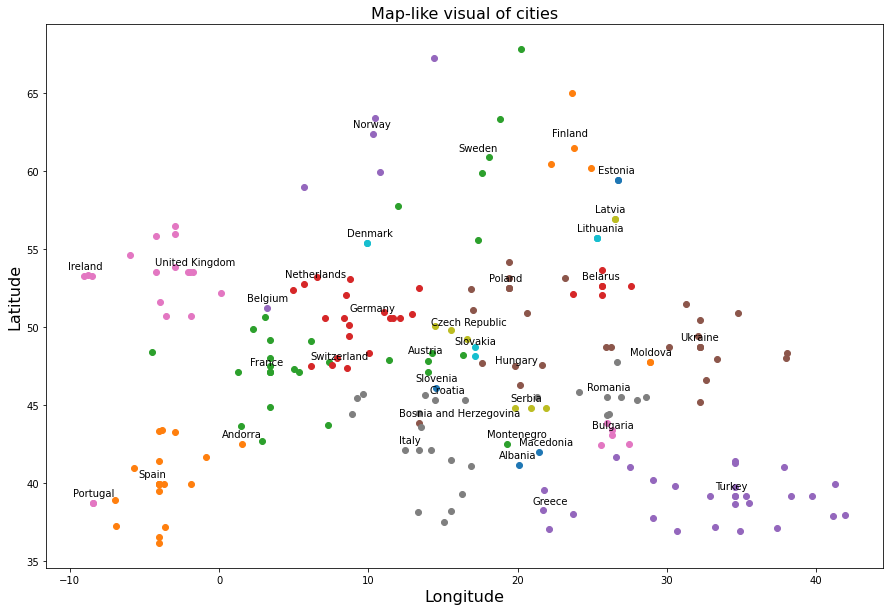

In [8]:
#Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. 
#All the cities in the same country should have the same color

groups = df1.groupby('country')
plt.figure(figsize=(15, 10))

for name, group in groups:
    y = group['latitude'].values
    x = group['longitude'].values
    plt.scatter(x, y, label=name, alpha=1)
    plt.annotate(name, xy=(x.mean(),y.mean()), 
        xytext=(-20,7),textcoords='offset points')

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude',fontsize=16)
plt.title('Map-like visual of cities',fontsize=16)
plt.show()

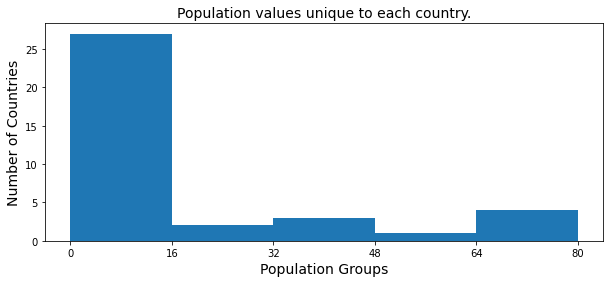

In [9]:
#The population column contains values unique to each country. So two cities of the same country will show the same population value.
#Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).

population = np.array(df1['population'].unique()).astype(int)

plt.figure(figsize=(10, 4))
plt.hist(population,bins=5)
plt.xticks(range(0,population.max()+1,round(population.max()/5)))
plt.ylabel('Number of Countries', fontsize=14)
plt.xlabel('Population Groups', fontsize=14)
plt.title('Population values unique to each country.', fontsize=14)
plt.show()

<ipython-input-10-90af9192b2e6>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i][j].set_xticklabels(df_temp['city'], rotation=90)


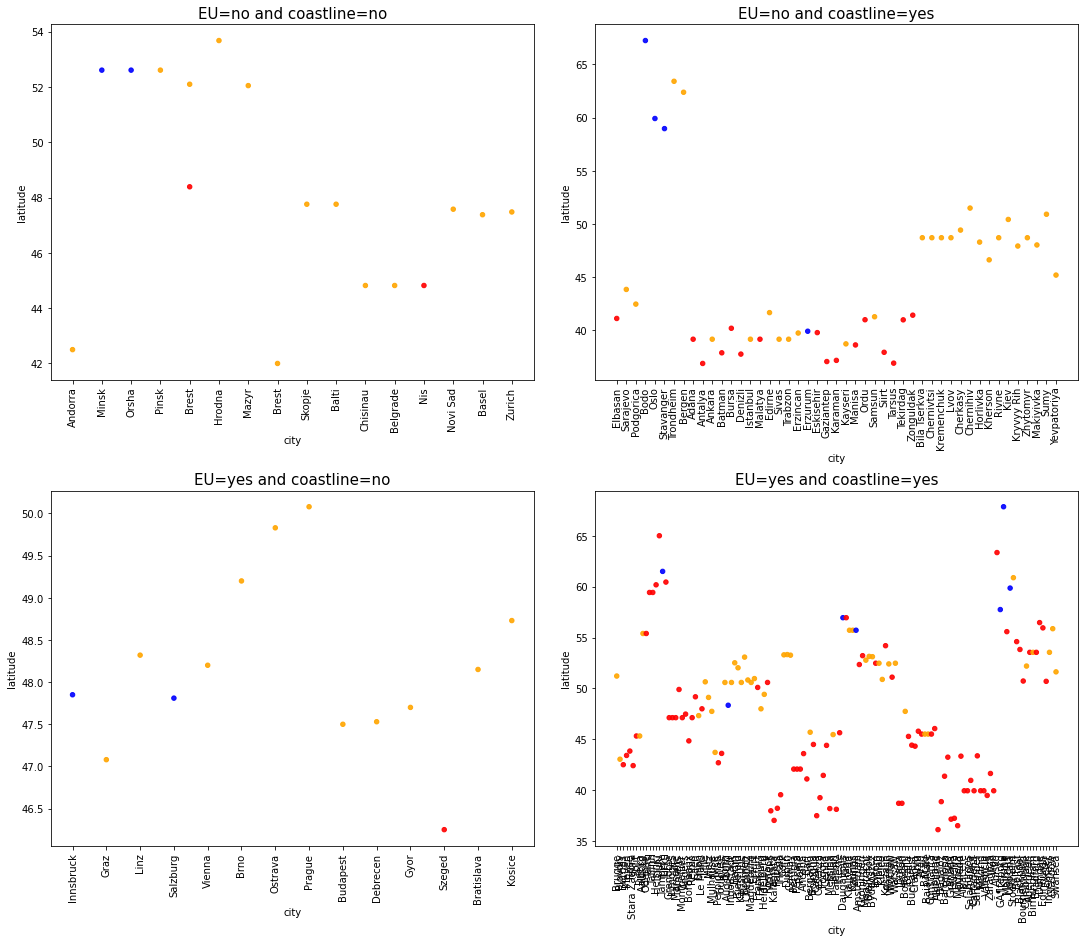

In [10]:
#Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
#Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). 
#For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. 
#This represents each city as a number between 0 and n-1.


def temp_color(temp_in):
    
    if temp_in > 10.0:
        color = 'red'
    elif temp_in < 6.0:
        color = 'blue'
    else:
        color = 'orange'
    return color

result = pd.concat([region_cities,df1[['latitude','longitude','temperature']]], axis=1)
result['color'] = np.array(df1['temperature'].apply(temp_color))

fig, axes = plt.subplots(2,2,figsize=(15,12))
fig.tight_layout(h_pad=9.0,w_pad=3.0)

switch = {0:'no',1:'yes'}
            
for i in (0,1):
    for j in (0,1):
        param_str = f'EU={switch.get(i)} and coastline={switch.get(j)}'
        df_temp = result[result['region'] == param_str]
        df_temp.plot('city','latitude',ax=axes[i][j], kind='scatter',color= df_temp['color'], alpha=0.9)
        axes[i][j].set_title(param_str, fontsize=15)
        axes[i][j].set_xticklabels(df_temp['city'], rotation=90)
        
  